In [419]:
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt


In [442]:
with open('AAPL.har') as f:
#     lines = f.readlines()
    j = json.loads(f.read())

In [443]:
j['log'].keys()

dict_keys(['version', 'creator', 'pages', 'entries'])

In [444]:
len(j['log']['version'])

3

In [445]:
j['log']['creator']

{'name': 'WebInspector', 'version': '537.36'}

In [446]:
len(j['log']['entries'])

318

In [447]:
j['log']['entries'][202].keys()

dict_keys(['_fromCache', '_initiator', '_priority', '_resourceType', 'cache', 'pageref', 'request', 'response', 'serverIPAddress', 'startedDateTime', 'time', 'timings'])

In [448]:
i_websocket = []
for i in range(203):
    if j['log']['entries'][i]['_resourceType'] == 'websocket':
        print(i)
        i_websocket.append(i)
        
i = i_websocket[0]

10


In [449]:
j['log']['entries'][i]['_resourceType'] 

'websocket'

In [450]:
len(j['log']['entries'][i]['_webSocketMessages'])

420

In [451]:
webSocketMessages = j['log']['entries'][i]['_webSocketMessages']

In [452]:
receivedMessages = []

for w in webSocketMessages:
    if w['type'] == 'receive':
        receivedMessages.append(w) 

In [453]:
len(receivedMessages)

237

In [454]:
_j

'st1'

In [455]:
txt = receivedMessages[3]['data']

In [456]:
txt_list = re.split('~m~\d*~m~',txt)

In [457]:
price_data = []

for rM in receivedMessages:
    txt = rM['data']
    txt_list = re.split('~m~\d*~m~',txt)
    for l in txt_list:
        try:
            _j = json.loads(l)['p'][1]
            price_data.append([s['v']  for s in _j['sds_1']['s']])
        except:
            continue

In [458]:
df = [pd.DataFrame(p) for p in price_data]
df = pd.concat(df)

In [459]:
df.columns = ['Date', 'open', 'high', 'low', 'close', 'volume']
df.Date = pd.to_datetime(df.Date, unit='s')

In [460]:
print('before drop duplicate', len(df))
df = df.drop_duplicates('Date')
df.sort_values('Date', inplace=True)
print('after',len(df))

before drop duplicate 13155
after 6621


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


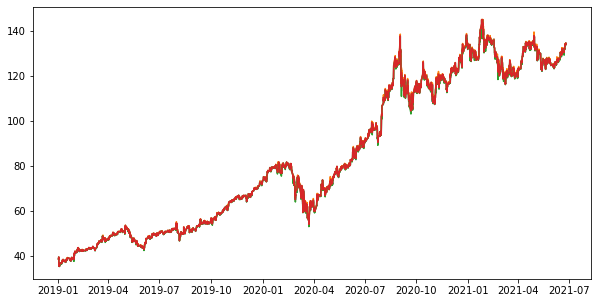

In [461]:
plt.figure(figsize=(10,5))
plt.plot(df.Date, df.open)
plt.plot(df.Date, df.high)
plt.plot(df.Date, df.low)
plt.plot(df.Date, df.close)


In [464]:
df.head(50)

,Date,open,high,low,close,volume
0,2019-01-02 12:00:00,38.70500,38.75000,38.6725,38.71500,9300.0
1,2019-01-02 13:00:00,38.61000,38.75000,38.6050,38.62750,6720.0
2,2019-01-02 14:00:00,38.75000,38.87500,38.5625,38.80000,1111248.0
3,2019-01-02 15:00:00,38.79500,39.29750,38.6450,39.21250,1248344.0
4,2019-01-02 16:00:00,39.23000,39.60500,39.1850,39.25750,1027760.0
5,2019-01-02 17:00:00,39.26500,39.59500,39.2350,39.53750,757336.0
6,2019-01-02 18:00:00,39.54500,39.71250,39.5400,39.68000,654300.0
7,2019-01-02 19:00:00,39.68250,39.68250,39.4425,39.47750,558704.0
8,2019-01-02 20:00:00,39.47500,39.50500,39.1875,39.47000,1521196.0
9,2019-01-02 21:00:00,37.35750,37.50000,36.1900,36.55750,118328.0
